In [0]:
# Εισαγωγή απαραίτητων imports εδώ
import numpy as np

from matplotlib import pyplot as plt

import cv2


from skimage.transform import rotate
from skimage import color
from skimage.util import random_noise
import skimage.filters as filters
from skimage.morphology import disk, rectangle
from skimage import feature
from scipy import ndimage as ndi

In [0]:
from skimage import img_as_float

def imshow_all(*images, titles=None, suptl=''):
    '''
     Sourced from Lab4.
     Function used to plot many images at once 
    '''

    images = [img_as_float(img) for img in images]

    if titles is None:
        titles = [''] * len(images)

    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    if suptl != '':
      fig.suptitle(suptl, fontsize=18, color='blue')
    for ax, img, label in zip(axes.ravel(), images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(label)

# Ερώτημα 1 (50%)
Στο ερώτημα αυτό θα χρησιμοποιήσετε αλγορίθμους εύρεσης ακμών, για να παράξετε ένα **cartoonified** αποτέλεσμα της εικόνας εισόδου. Το σκεπτικό είναι να εκμεταλευθείτε τις φυσικές ακμές της εικόνας για να δημιουργήσετε "περιγράμματα".

Η υλοποίηση του ερωτήματος θα ακολουθεί τα εξής βήματα:

1.   Να δημιουργήσετε **μια εικόνα με τα πρόσωπα των μελών της ομάδας σας**. Μπορείτε να αποκτήσετε την εικόνα κάθε μέλους με όποιον τρόπο θέλετε, αρκεί να είναι όσο πιο καθαρή γίνεται, σε όσο το δυνατόν καλύτερες συνθήκες φωτισμού. Οι διαστάσεις των ατομικών εικόνων προτείνουμε να είναι **512x288**.
  
- **Για ομάδες 2 ατόμων:** Να φορτώσετε και να ενώσετε, με τη χρήση κώδικα python, τις εικόνες των επι μέρους μελών σε μια τελική εικόνα  (**512x576**.)

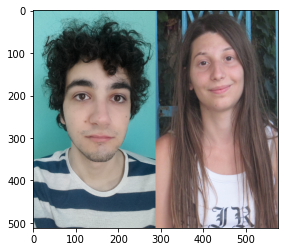

In [3]:
#image loading (see pictures provided)
pic1 = plt.imread("dim.jpg")
pic2 = plt.imread("dan.jpg")

#image size to be reshaped to
y_size = 512
x_size = 288

#Resize each image
pic1 = cv2.resize(pic1, (x_size, y_size) )
pic2 = cv2.resize(pic2, (x_size, y_size) )

#image concatenation into one
pic = np.concatenate((pic1, pic2), axis=1)
plt.imshow(pic)

2. Να επιλέξετε τον κατάλληλο χρωματικό χώρο για την εικόνα εισόδου σας. \


Επιλέγουμε τον γκρίζο χρωματικό χώρο καθώς είναι ο πλέον εύκολος για την αναγνώριση ακμών στις μεθόδους που έχουμε μελετήσει στα πλαίσια αυτού του μαθήματος. Σημειώνουμε ότι υπάρχουν μέθοδοι ανίχνευσης ακμών σε μεγαλύτερους χρωματικούς χώρους (πχ. RGB) που όμως δεν μας απασχολούν στην παρούσα εργαστηριακή άσκηση.

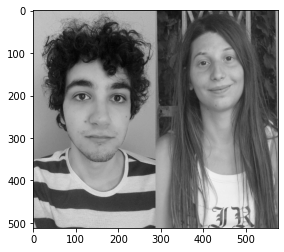

In [4]:
pic_gray = color.rgb2gray(pic)
plt.imshow(pic_gray, cmap='gray')


3.   Να εφαρμόσετε θόρυβο στην εικόνα, χρησιμοποιώντας τη μέθοδο `random_noise` του πακέτου `skimage.util` και να ακολουθήστε τα παρακάτω, μοναδικά για την κάθε ομάδα, βήματα. Στη συνέχεια να τυπώσετε το αποτέλεσμα.

*   **Gaussian** θόρυβο, με `seed` ίσο με το **τελευταίο** ψηφίο του **ΑΜ** του πρώτου (ή μοναδικού) μέλους της ομάδας.
*   **Salt and Pepper** θόρυβο με `seed` ίσο με το **τελευταίο** ψηφίο του **ΑΜ** του πρώτου (ή μοναδικού) μέλους της ομάδας και `amount` που δίνεται από τον τύπο:

  $amount(x)=\frac{1}{90}x + 0.3$

  όπου $x$ το **προτελευταίο** ψηφίο του **ΑΜ** του ίδιου μέλους. Ο παραπάνω τύπος θα πρέπει να υλοποιηθεί σε ξεχωριστή **μέθοδο** στον κώδικά σας και να καλείται όταν χρειαστεί.

In [0]:
'''
The following code generates the noise as required by the exercise
'''
def get_seed(AM):
  return int(AM[-1])
def snpAmount(AM):
  '''
  Input: AM (string type)
  Output amount for 'salt and pepper' noise generation 
  '''
  digit = AM[-2]
  return float((float(digit)/90) + 0.3)



Text(0.5, 1.0, 'Image with Salt & Paper noise')

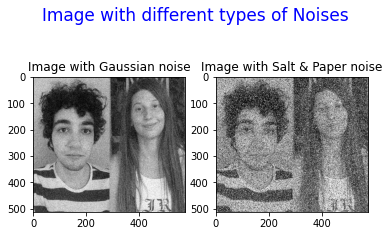

In [6]:
AM =  '03116045' #danae's AM
seed = get_seed(AM)
amount = snpAmount(AM)

#generate gauss noise using the seed calculated as required by the exercise
pic_gauss = random_noise(pic_gray, mode='gaussian', seed = seed)
#generate salt & pepper noise using the seed, amount calculated as required by the exercise
pic_snp = random_noise(pic_gray, mode='s&p', seed= seed, amount = amount)

#display original image and images with different types of noise
fig, axs = plt.subplots(1,2)
fig.suptitle('Image with different types of Noises', fontsize = 17,color='b')
axs[0].imshow(pic_gauss, cmap='gray')
axs[0].set_title('Image with Gaussian noise')
axs[1].imshow(pic_snp,cmap='gray')
axs[1].set_title('Image with Salt & Paper noise')

H παραμόρφωση λόγω θορύβου είναι αρκετά πιο αισθητή στην περίπτωση του Salt & Pepper θορύβου, κάτι αναμενόμενο αφού o Salt & Pepper -σε αντίθεση με τον Gaussian θόρυβο - δεν είναι αθροιστικός και μεταβάλει κατα μια πιθανότητα ένα pixel είτε σε 1 είτε σε 0. Ο Gaussian θόρυβος είναι λιγότερο αισθητός στο ανθρώπινο μάτι για αυτόν τον λόγο και επειδή οι τιμές που παίρνει ανήκουν σε ένα εύρος τιμών και όχι μόνο 0 ή 1. 

4.   Να εφαρμόσετε **mean**, **median** και **gaussian filtering** και στις δύο εικόνες του προηγούμενου βήματος. Μπορείτε να πειραματιστείτε με την παραμετροποίηση των φίλτρων. Να τυπώσετε το αποτέλεσμα της εφαρμογής κάθε φιλτρου (συμπεριλαμβανομένων των διάφορων πειραματισμών που θα κάνετε). Συγκρίνετε τα αποτελέσματα και εξηγήστε ποιό φίλτρο απέδωσε καλύτερα σε κάθε εικόνα και γιατί.

/usr/local/lib/python3.6/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


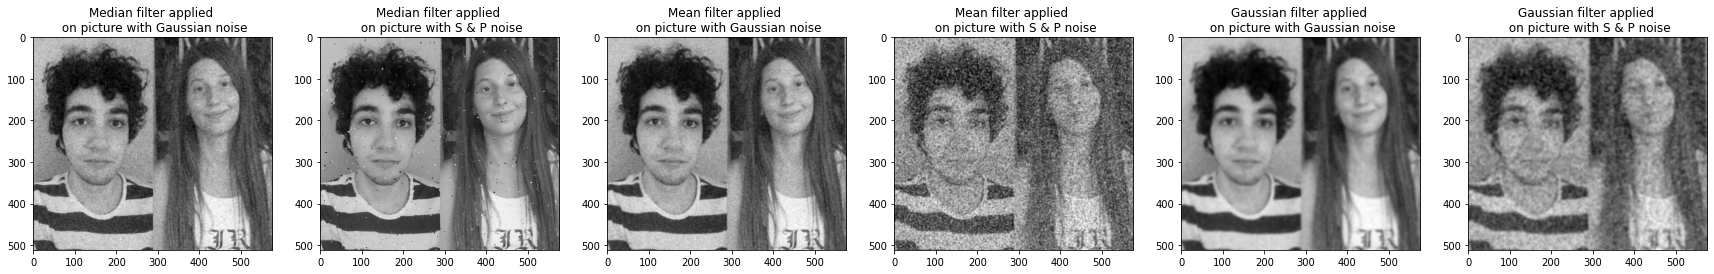

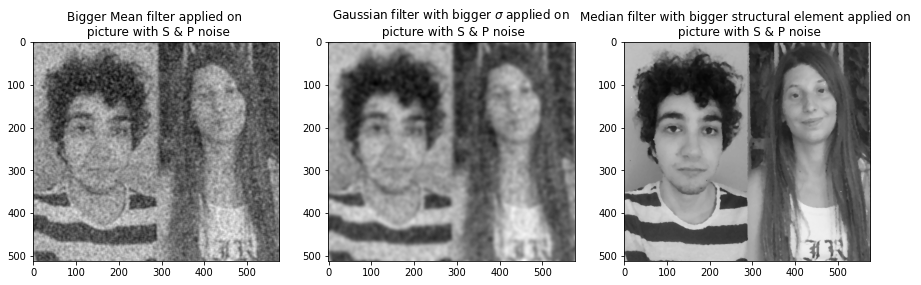

In [7]:
#structural element used for median filtering
disk_struc = disk(radius=2)

#apply median filter on picture with either gaussian or S&P type of noise
pic_median_gauss = filters.rank.median(pic_gauss, disk_struc)
pic_median_snp = filters.rank.median(pic_snp, disk_struc)

#apply mean filter on picture with either gaussian or S&P type of noise
pic_mean_gauss = filters.rank.mean(pic_gauss, disk_struc)
pic_mean_snp = filters.rank.mean(pic_snp, disk_struc)

#apply gaussian filter on picture with either gaussian or S&P type of noise
sigma = 2.5
pic_gauss_gauss = filters.gaussian(pic_gauss, sigma)
pic_gauss_snp = filters.gaussian(pic_snp, sigma)

#plot filtering results
imshow_all(pic_median_gauss, pic_median_snp, pic_mean_gauss, pic_mean_snp, pic_gauss_gauss, pic_gauss_snp, titles=['Median filter applied \n on picture with Gaussian noise', \
                                                                                   'Median filter applied \n on picture with S & P noise', \
                                                                                   'Mean filter applied \n on picture with Gaussian noise', \
                                                                                   'Mean filter applied \n on picture with S & P noise', \
                                                                                   'Gaussian filter applied \n on picture with Gaussian noise', \
                                                                                   'Gaussian filter applied \n on picture with S & P noise' \
                                                                                   ])

#testing filter parameters
big_rect = rectangle(6,6)
big_sigma = 3.9
pic_mean_snp_bigrect =  filters.rank.mean(pic_snp, big_rect)
pic_gaussian_snp_bigkern = filters.gaussian(pic_snp, big_sigma)
pic_median_snp_bigdisk = filters.rank.median(pic_snp, disk(radius=3))

pic_median_snp = pic_median_snp_bigdisk
imshow_all(pic_mean_snp_bigrect, pic_gaussian_snp_bigkern, pic_median_snp_bigdisk, titles=['Bigger Mean filter applied on \n picture with S & P noise' ,\
                                                                   'Gaussian filter with bigger $\sigma$ applied on \n picture with S & P noise', \
                                                                   'Median filter with bigger structural element applied on \n picture with S & P noise'])


Τα αποτελέσματα εφαρμογής των φίλτρων φαίνονται παραπάνω. \



*   **Για S&P θόρυβο**: Παρατηρούμε πως το καλύτερο φίλτρο είναι το median. Αυτό εξηγείται από την λογική του median φίλτρου, η οποία το καθιστά ιδιαίτερα αποτελεσματικό στον salt & pepper θόρυβο, αφού γενικά διατηρεί τις ακμές. Αυτό επειδή, στην γειτονιά των ακμών υπάρχει μεγάλη διασπορά στις τιμές φωετεινότητας και επομένως η επιλεγχθείσα τιμή θα παρουσιάζει κάποια απόκλιση από την μέση τιμή της φωτεινότητας στην γειτονιά - και πρακτικά θα αντιστοιχεί είτε σε pixel την μιας πλευράς της ακμής είτε της άλλης. Όμως επειδή ο S&P θόρυβος είναι ισοκατανεμημένος μεταξύ 0 και 1, δεν θα πρέπει να επηρεάζει την επιλεχθείσα ενδιάμεση τιμή στην γειτονιά. \
Το Mean filter, προφανώς αποτυγχάνει στην περίπτωση του S&P θορύβου, γιατί βρίσκει την μέση τιμή, η οποία όμως - λόγω της υψηλής διασποράς που εισάγει ο S & P θόρυβος - δεν αντιστοιχεί σε καμία από τις 2 πλευρές της ακμής. \
Το Gaussian filter, δεν διαφέρει πολύ από το mean filter, απλώς το Kernel έχει κατασκευαστεί ώστε δίνοντας μια διαβαθμισμένη βαρύτητα στα pixel της γειτονιάς, να παράγει πιο ομαλά αποτελέσματα για την αναγνώριση ακμών από το ανθρώπινο μάτι. Ακολουθεί όμως την ίδια (γραμμική) λογική με το mean filtering και,επομένως, επίσης αποτυγχάνει στην αποθορυβοποίηση. 
*   **Για Gaussian θόρυβο**: Παρατηρούμε πως το καλύτερα αποτελέσματα αμς τα δίνει το Gaussian φίλτρο. Αυτό εξηγείται από το γεγονός ότι, ο Gaussian θόρυβος είναι πιο ομοιόμορφα κατανεμημένος από τον S&P θόρυβο ,και επομένως, θα έχει τιμές ενδιάμεσα των τιμών των 2 πλευρών μιας ακμής. Επομένως ένα median φίλτρο δεν θα παρείχε το ίδιο ικανοποιητικά αποτελέσματα σε αυτήν την περίπτωση αφού η ενδιάμεση τιμή θα μεταβαλλόταν πολύ λόγω του θορύβου. Αντίθετα, (γραμμικά)φίλτρα μέσης τιμής ή σταθμισμένης μέσης τιμής όπως το Gaussian δεν επηρεάζονται τόσο πολύ αφού η μέση τιμή δεν μεταβάλλεται πολύ από τον Gaussian θόρυβο.

Επίσης, πειραματιστήκαμε με μεγαλύτερο δομικό στοιχείο για το mean filter και διαφορετική μορφολογία kernel και μεγαλύτερο *σ* για το Gaussian filter, στην περίπτωση του S&P θορύβου. Παρατηρούμε πως και στις δύο περιπτώσεις, αν και επιτυγχάνουμε καλύτερη αποθορυβοποίηση, χάνουμε διακριτική ικανότητα στις ακμές, αφού η εικόνα έχει θολώσει υπερβολικά. \
Πειραματιστήκαμε με μεγαλύτερο δομικό στοιχείο για το median φίλτρο (δίσκος ακτίνας 3 αντί για 2) και βλέπουμε πως με αυτό τον τρόπο καταφέρνουμε να αποθορυβοποιήσουμε σχεδόν πλήρως τις εικόνες, με ελάχιστο κόστος στην οξύτητα των ακμών τους. Επομένως, το median φίλτρο που θα χρησιμοποιούμε στα επόμενα ερωτήματα είναι αυτό με δομικό στοιχείο ακτίνας 3.





5.   Να εφαρμόσετε τους ανιχνευτές ακμών **Laplacian**, **Canny** και **Marr-Hildreth** στα καλύτερα αποτελέσματα αποθορυβοποίησης των δύο εικόνων θορύβου του βήματος 3 (το καλύτερο αποτέλεσμα για την εικόνα gaussian θορύβου και το καλύτερο αποτέλεσμα για την εικόνα salt and pepper θορύβου). Μπορείτε να πειραματιστείτε με την παραμετροποίηση των ανιχνευτών, με στόχο το καλύτερο δυνατό αποτέλεσμα. Να τυπώσετε το αποτέλεσμα της εφαρμογής κάθε φιλτρου (συμπεριλαμβανομένων των διάφορων πειραματισμών που θα κάνετε).

Παρακάτω δίνουμε μια υλοποίηση συνάρτησης εύρεσης των σημείων zerocrossing μιας εικόνας χρησιμοποιώντας πληροφορία από την LoG εικόνα. Αυτό είναι αναγκαίο στην περίπτωση της μεθόδου Marr-Hildreth η οποία δεν επιστρέφουν δυαδική εικόνα ακμών, αλλά ένα μετρικό του κατά πόσο ένα pixel ανήκει σε ακμή και επομένως δεν παίρνει μόνο δυαδικές τιμές. Ο αλγόριθμος που υλοποιούμε είναι ο εξής:


1.   Υπολογίζουμε την εικόνα προσήμου της εικόνας αφού έχει φιλτραριστεί με το LoG kernel. Εμάς μας ενδιαφέρουν τα σημεία που γίνεται η εναλλαγή του προσήμου (zerocrossing).
2.   Mέσω των μορφολικών τελεστών erosion, dilation υπολογίζουμε το περίγραμμα (border) των ακμών ως την διαφορά της εικόνας αφού έχει υποστεί dilation και της εικόνας αφού έχει υποστεί erosion.
3.   Δεν είναι κάθε σημείο του border ακμή. Ορίζουμε ως μετρική για το αν ένα σημείο είναι όντως ακμη, μια γενικευμένη ενέργεια την οποία υπολογίζουμε ως την τετραγωνική ρίζα του αθρόίσματος των τετραγώνων των παραγώγων της ομαλοποιημένης εικόνας. Χρησιμοποιώντας ένα κατώφλι ,που βασίζεται σε ποσοστό επί της μέγιστης ενέργειας, ορίζουμε ως ακμή ένα pixel που ανήκει σε ένα border και έχει ενέργεια πάνω από το παραπάνω όριο.



In [0]:
def zerocrossings(L,smooth_image,theta=0.16):
    '''
    Function that calculates zero-crossings of image 
    using morphological operators on LoG Image and 
    thresholding on the original image
    Input:
    L: LoG of the Image
    smooth_image: image after smoothing
    theta: threshold (percent of maximum gradient on smooth image)
    '''
    #Sign image of LoG
    X = (L >= 0).astype(float)

    #Dilation kernel
    dil_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(4,4))
    #Erosion kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    #apply dilation and erosion kernel on image
    erosion = cv2.erode(X,kernel,iterations = 1)
    dilation = cv2.dilate(X,dil_kernel,iterations = 1)

    #Calculate Image's border 
    Y = dilation-erosion

    #calculate gradients used for thresholding
    x_grad = np.gradient(smooth_image)[0]
    y_grad = np.gradient(smooth_image)[1]
    #calculate edge energy
    magnitude = np.sqrt(np.square(x_grad)+np.square(y_grad))
    max_grad = np.max(magnitude)
    #apply thresholding on Border image using percentage of maximum edge energy
    gradient = (magnitude > theta*max_grad)
    #returns pixels that are border and have energy > percentage of maximum edge energy
    edges = Y.astype(bool) & gradient
    
    return edges


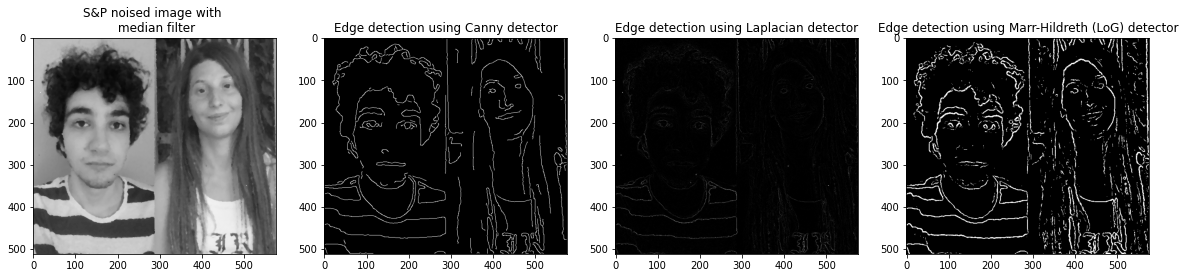

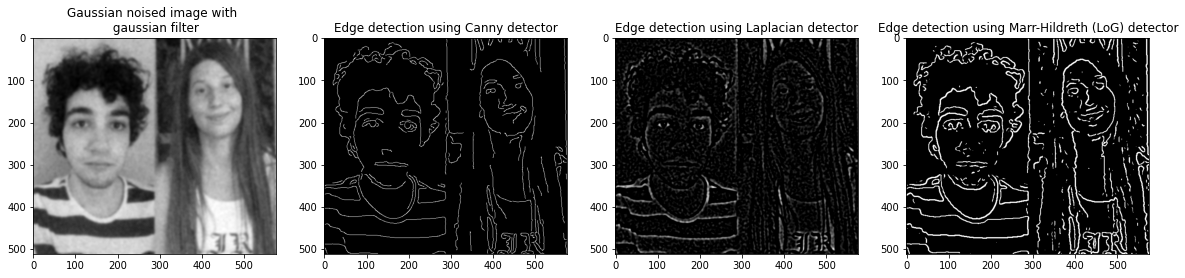

In [9]:
#select best filters for the noised images
best_snp = pic_median_snp / 255
best_gaussian = pic_gauss_gauss

#canny detector
pic_canny_snp = feature.canny(best_snp,1.9)
pic_canny_gaussian = feature.canny(best_gaussian,0.2)

#Laplacian detector
pic_laplacian_snp = np.clip(filters.laplace(best_snp),0,1)
pic_laplacian_gaussian = np.clip(filters.laplace(best_gaussian),0,1)

#Marr-Hildreth detector
sigma_log = 3
pic_log_snp = ndi.gaussian_laplace(best_snp, sigma_log)
pic_log_gaussian = ndi.gaussian_laplace(best_gaussian, sigma_log)
#calculate image edges from LoG values
log_snp_edges = zerocrossings(pic_log_snp , best_snp, theta=0.04)
log_gaussian_edges = zerocrossings(pic_log_gaussian, best_gaussian)


#display results for picture with S&P noise
imshow_all(best_snp, pic_canny_snp, pic_laplacian_snp, log_snp_edges, titles=['S&P noised image with \n median filter', \
                                                                             'Edge detection using Canny detector', \
                                                                            'Edge detection using Laplacian detector', \
                                                                            'Edge detection using Marr-Hildreth (LoG) detector'])
#display results for picture with Gaussian noise
imshow_all(best_gaussian, pic_canny_gaussian, pic_laplacian_gaussian, log_gaussian_edges, titles=['Gaussian noised image with \n gaussian filter', \
                                                                             'Edge detection using Canny detector', \
                                                                            'Edge detection using Laplacian detector', \
                                                                            'Edge detection using Marr-Hildreth (LoG) detector'])



Τα αποτελέσματα ανίχνευσης ακμών φαίνονται παραπάνω για όλα τα ζεύγη ανιχνευτών ακμών και θορύβων. Συνολικά παρατηρούμε ότι καλύτερη ανίχνευση γίνεται στις εικόνες με Gaussian θόρυβο, αφού εκεί υπάρχουν λιγότερα artifacts ακμών και ο θόρυβος είναι πιο κατανεμημένος σε μια **περιοχή** pixel. \
Ακόμη, παρατηρούμε πως συνολικά ο ανιχνευτής ακμών Canny παρουσιάζει καλύτερα αποτελέσματα, κάτι που περιμέναμε αφού λόγω του  Non-maxima supression που πραγματοποιεί, εξαιρούνται από ακμές τα pixels που αντιστοιχούν σε ίδια γωνία αλλά με μικρότερη τιμή από την τρέχουσα μέγιστη για την κατεύθυνση αυτή.\
 Ακόμη πραγματοποιεί Hysteresis thresholding ώστε να επιστρέφονται ως ακμές τα pixels με τιμή gradient μεγαλύτερη ενός κάτω ορίου. Αντίθετα, στου ανιχνευτές Laplacian και Marr-Hildreth, δεν υπάρχει κάποιο thresholding με αποτέλεσμα περισσότερα λάθη στην αναγνώριση ακμών. Παρόλα αυτά, εμείς στο Marr-Hildreth ανιχνευτή, για καλύτερα αποτελέσματα, πραγματοποιούμε ένα στοιχειώδες thresholding στο μέτρο του gradient αφού πρώτα έχουμε εφαρμόσει μορφολογικά φίλτρα για την εύρεση του περιγράμματος των αντικειμένων της εικόνας. \
 Παρακάτω, πειραματιζόμαστε σχετικά με τις παραμέτρους των παραπάνω ανιχνευτών ακμών. Φυσικά η αξιολόγηση των αποτελεσμάτων γίνεται με γνώμονα και τις δύο εικόνες ταυτόγχρονα, αφού προσπαθούμε να εμφανίσουμε αξιόλογα αποτελέσματα και στις δύο. 

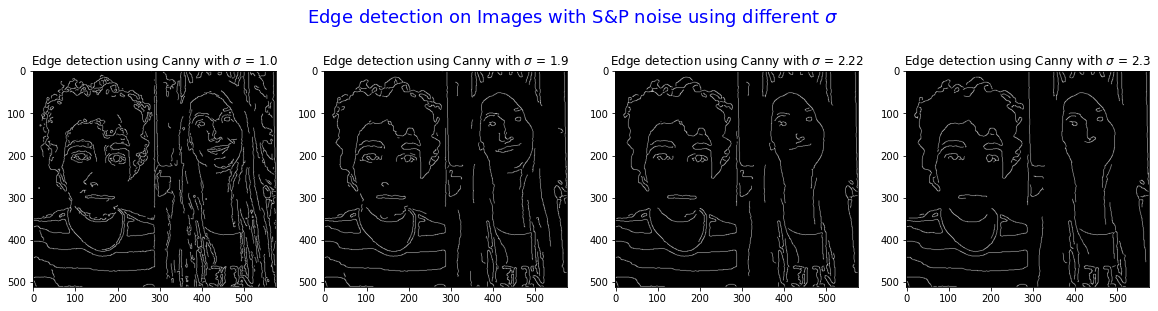

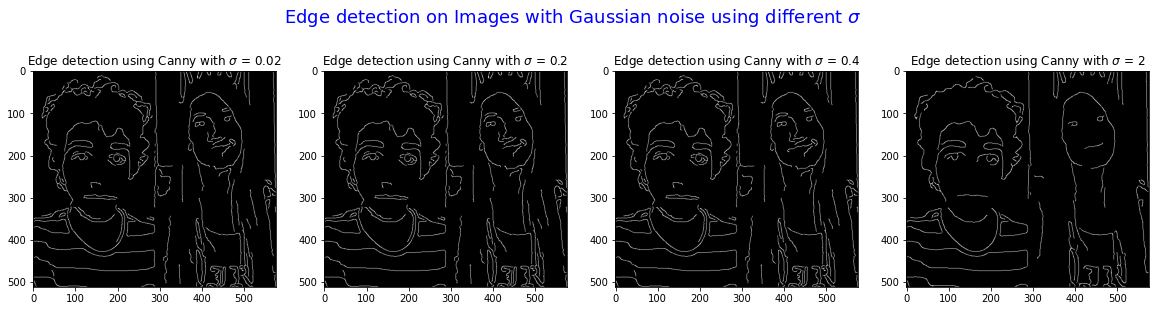

In [10]:
#canny detector under S&P noise for different sigma
pic_canny_snp_2 = feature.canny(best_snp,1.9)
pic_canny_snp_1 = feature.canny(best_snp,1.0)
pic_canny_snp_4 = feature.canny(best_snp,2.7)
pic_canny_snp_3 = feature.canny(best_snp,2.22)

#best sigma for canny under S&P noise
canny_snp_best  = pic_canny_snp_2

#canny detector under gaussian noise for different sigma
pic_canny_gaussian_2 = feature.canny(best_gaussian,0.16)
pic_canny_gaussian_1 = feature.canny(best_gaussian,0.02)
pic_canny_gaussian_4 = feature.canny(best_gaussian,2)
pic_canny_gaussian_3 = feature.canny(best_gaussian,0.4)

#best sigma for canny under gaussian noise
canny_gauss_best = pic_canny_gaussian_2

#display results
imshow_all(pic_canny_snp_1, pic_canny_snp_2,pic_canny_snp_3, pic_canny_snp_4, titles=['Edge detection using Canny with $\sigma$ = 1.0', \
                                                                             'Edge detection using Canny with $\sigma$ = 1.9', \
                                                                            'Edge detection using Canny with $\sigma$ = 2.22', \
                                                                            'Edge detection using Canny with $\sigma$ = 2.3'], \
                                                                              suptl ='Edge detection on Images with S&P noise using different $\sigma$')


imshow_all(pic_canny_gaussian_1, pic_canny_gaussian_2,pic_canny_gaussian_3, pic_canny_gaussian_4, titles=['Edge detection using Canny with $\sigma$ = 0.02', \
                                                                             'Edge detection using Canny with $\sigma$ = 0.2', \
                                                                            'Edge detection using Canny with $\sigma$ = 0.4', \
                                                                            'Edge detection using Canny with $\sigma$ = 2'], \
                                                                              suptl ='Edge detection on Images with Gaussian noise using different $\sigma$')

Παρατηρούμε πως στην περίπτωση του S&P θορύβου (όπου οι παραμορφώσεις λόγω θορύβου είναι πιο αισθητές) μικρά σ συνεπάγονται χειρότερη αποθορυβοποίηση της εικόνας αφού διακρίνονται ως ακμές σημεία που δεν είναι όντως. Αντίθετα, για μεγάλο σ, η εξομάλυνση της εικόνας είναι πολύ μεγάλη με αποτέλεσμα ναι μεν να αποκλείονται από ακμές σημεία που έχουν προέρθει από θόρυβο αλλά και ,λόγω της λείανσης των ακμών, να αποκλείονται πραγματικές ακμές της εικόνας (όπως πχ. η μύτες μας). Κρίνουμε πως ένα σ της τάξη 2.1 παράγει ικανοποιητικά αποτελέσματα. \
Η κατάσταση είναι σαφώς καλύτερη στην περίπτωση του Gaussian θορύβου, αφού η εξομάλυνση του προηγούμενου βήματος της άσκησης, έχει ήδη επιτύχει ικανοποιητική αποθορυβοποίηση. Επομένως μπορούμε, χωρις να επισφρύει πολύς θόρυβος, να επιλέξουμε ένα σ της τάξης του 0.16

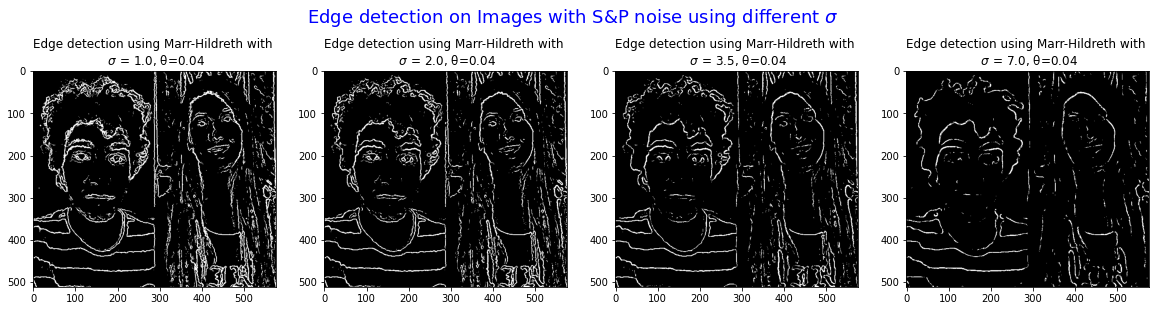

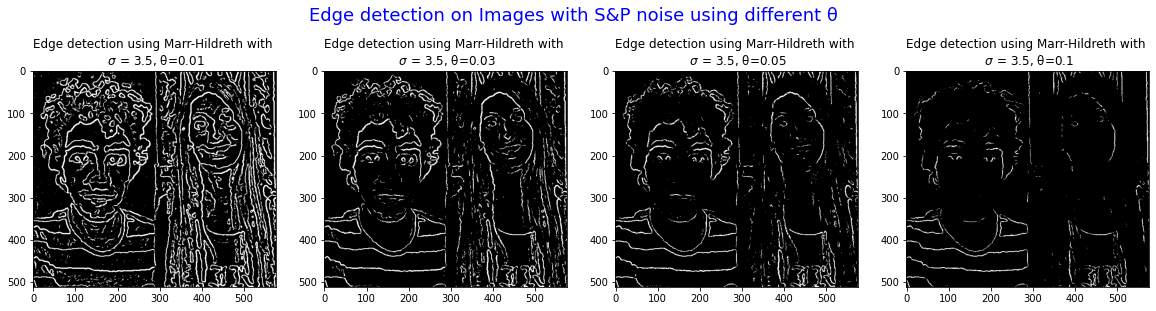

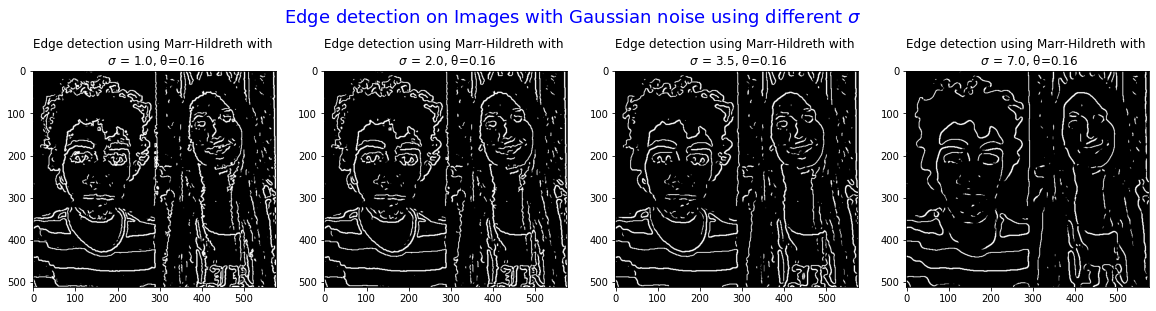

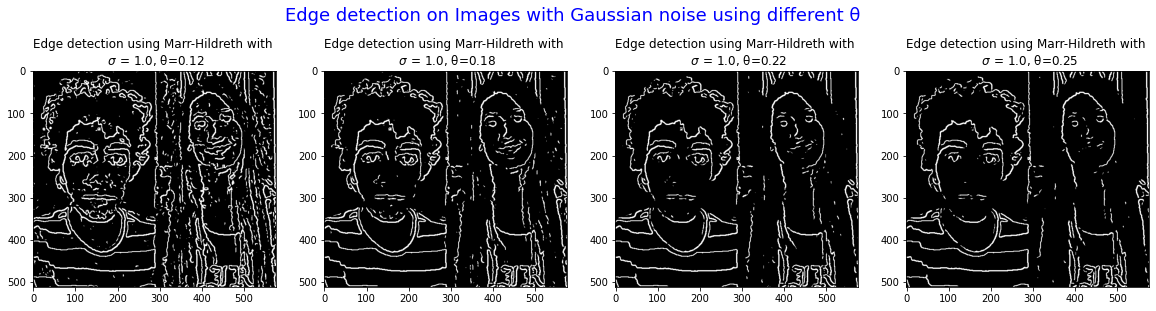

In [11]:

#Marr-Hildreth detector under S&P noise for different sigma
pic_log_snp_1 = ndi.gaussian_laplace(best_snp, 1)
pic_log_snp_2 = ndi.gaussian_laplace(best_snp, 2)
pic_log_snp_3 = ndi.gaussian_laplace(best_snp, 3.5)
pic_log_snp_4 = ndi.gaussian_laplace(best_snp, 7)

#use LoG calculated above to find edges using function zerocrossings
log_snp_edges_1 = zerocrossings(pic_log_snp_1 , best_snp, theta=0.04)
log_snp_edges_2 = zerocrossings(pic_log_snp_2 , best_snp, theta=0.04)
log_snp_edges_3 = zerocrossings(pic_log_snp_3 , best_snp, theta=0.04)
log_snp_edges_4 = zerocrossings(pic_log_snp_4 , best_snp, theta=0.04)

#display results
imshow_all(log_snp_edges_1, log_snp_edges_2,log_snp_edges_3, log_snp_edges_4, titles=['Edge detection using Marr-Hildreth with \n $\sigma$ = 1.0, θ=0.04', \
                                                                             'Edge detection using Marr-Hildreth with \n $\sigma$ = 2.0, θ=0.04', \
                                                                            'Edge detection using Marr-Hildreth with \n $\sigma$ = 3.5, θ=0.04', \
                                                                            'Edge detection using Marr-Hildreth with \n $\sigma$ = 7.0, θ=0.04'], \
                                                                              suptl ='Edge detection on Images with S&P noise using different $\sigma$')

# find optimal theta for best sigma found above
log_snp_edges_1 = zerocrossings(pic_log_snp_3 , best_snp, theta=0.01)
log_snp_edges_2 = zerocrossings(pic_log_snp_3 , best_snp, theta=0.03)
log_snp_edges_3 = zerocrossings(pic_log_snp_3 , best_snp, theta=0.05)
log_snp_edges_4 = zerocrossings(pic_log_snp_3 , best_snp, theta=0.1)

#best sigma , theta for Marr-Hildreth under S&P noise
log_snp_best = log_snp_edges_2

#display results
imshow_all(log_snp_edges_1, log_snp_edges_2,log_snp_edges_3, log_snp_edges_4, titles=['Edge detection using Marr-Hildreth with \n $\sigma$ = 3.5, θ=0.01', \
                                                                             'Edge detection using Marr-Hildreth with \n $\sigma$ = 3.5, θ=0.03', \
                                                                            'Edge detection using Marr-Hildreth with \n $\sigma$ = 3.5, θ=0.05', \
                                                                            'Edge detection using Marr-Hildreth with \n $\sigma$ = 3.5, θ=0.1'], \
                                                                              suptl ='Edge detection on Images with S&P noise using different θ')

#Marr-Hildreth detector under gaussian noise for different sigma
pic_log_gaussian_1 = ndi.gaussian_laplace(best_gaussian, 1)
pic_log_gaussian_2 = ndi.gaussian_laplace(best_gaussian, 2)
pic_log_gaussian_3 = ndi.gaussian_laplace(best_gaussian, 3.5)
pic_log_gaussian_4 = ndi.gaussian_laplace(best_gaussian, 7)

#use LoG calculated above to find edges using function zerocrossings
log_gaussian_edges_1 = zerocrossings(pic_log_gaussian_1 , best_gaussian, theta=0.16)
log_gaussian_edges_2 = zerocrossings(pic_log_gaussian_2 , best_gaussian, theta=0.16)
log_gaussian_edges_3 = zerocrossings(pic_log_gaussian_3 , best_gaussian, theta=0.16)
log_gaussian_edges_4 = zerocrossings(pic_log_gaussian_4 , best_gaussian, theta=0.16)

#display results
imshow_all(log_gaussian_edges_1, log_gaussian_edges_2,log_gaussian_edges_3, log_gaussian_edges_4, titles=['Edge detection using Marr-Hildreth with \n $\sigma$ = 1.0, θ=0.16', \
                                                                             'Edge detection using Marr-Hildreth with \n $\sigma$ = 2.0, θ=0.16', \
                                                                            'Edge detection using Marr-Hildreth with \n $\sigma$ = 3.5, θ=0.16', \
                                                                            'Edge detection using Marr-Hildreth with \n $\sigma$ = 7.0, θ=0.16'], \
                                                                              suptl ='Edge detection on Images with Gaussian noise using different $\sigma$')

# find optimal theta for best sigma found above
log_gaussian_edges_1 = zerocrossings(pic_log_gaussian_2 , best_gaussian, theta=0.12)
log_gaussian_edges_2 = zerocrossings(pic_log_gaussian_2 , best_gaussian, theta=0.18)
log_gaussian_edges_3 = zerocrossings(pic_log_gaussian_2 , best_gaussian, theta=0.22)
log_gaussian_edges_4 = zerocrossings(pic_log_gaussian_2 , best_gaussian, theta=0.25)

#best sigma , theta for Marr-Hildreth under Gaussian noise
log_gauss_best = log_gaussian_edges_2


#display results
imshow_all(log_gaussian_edges_1, log_gaussian_edges_2,log_gaussian_edges_3, log_gaussian_edges_4, titles=['Edge detection using Marr-Hildreth with \n $\sigma$ = 1.0, θ=0.12', \
                                                                             'Edge detection using Marr-Hildreth with \n $\sigma$ = 1.0, θ=0.18', \
                                                                            'Edge detection using Marr-Hildreth with \n $\sigma$ = 1.0, θ=0.22', \
                                                                            'Edge detection using Marr-Hildreth with \n $\sigma$ = 1.0, θ=0.25'], \
                                                                              suptl ='Edge detection on Images with Gaussian noise using different θ')






Σχετικά με την παράμετρο θ, παρατηρούμε πως μικρές τιμές θ αντιστοιχούν σε λιγότερη κατωφλιοποίηση των ακμών και επομένως σε αναγνώριση ως ακμες σημείων που αποτελούν σημεία θορύβο. Για μεγαλύτερες τιμές θ, ως ακμές αναγνωρίζονται μόνο τα pixels η τιμή του |gradient| των οποίων αποτελεί τοπικό μέγιστο (δηλαδή > θ * max grad περιοχης)και επομένως μόνο τις σίγουρες ακμές (πχ. ρίγες στην πλούζα, μάτια). Συνολικά, καλύτερα αποτελέσματα έχουμε στον S&P θόρυβο  για τον συνδυασμό παραμέτρων σ = 3.5, θ = 0.03. \
Αντίστοιχες παρατηρήσεις έχουμε στην περίπτωση του Gaussian θορύβου, όπου όμως λόγω της μικρότερης παραμόρφωσης μπορούμε να κρατήσουμε περισσότερη λεπτομέρεια ακμών χρησιμοποιώντας μικρότερο σ. Συγκεκριμένα, καλύτερα αποτελέσματα έχουμε στον Gaussian θόρυβο για τον συνδυασμό παραμέτρων σ = 1.0, θ = 0.18

6.   Να αναπτύξετε **μέθοδο** που θα δέχεται σαν είσοδο την **αρχική εικόνα** και μια **εικόνα ακμών** και θα επιστρέφει μια εικόνα, στην οποία τα pixels της αρχικής εικόνας, που αντιστοιχούν στα pixels ακμών της εικόνας ακμών, θα έχουν αντικατασταθεί από χρώμα της επιλογής σας (κατά προτίμηση, μαύρο). Να χρησιμοποιήσετε τη μέθοδο αυτή για να παράξετε το cartoonified αποτέλεσμα, χρησιμοποιώντας ως εικόνες ακμών τα αποτελέσματα του βήματος 5. Συγκρίνετε την απόδοση των διαφορετικών αλγορίθμων και πειραματισμών και εξηγήστε με ποιον τρόπο πήρατε το πιο καθαρό και αισθητικά καλύτερο αποτέλεσμα.

In [0]:
def cartoonify(source_img, edge_img, boldn=3):
  '''
  Cartoonifies given image (source_img) using its detected edges (edge_img), optional boldness parameter
  '''
  #dilate edges in order to have more bold lines highlighting image's edges
  dilation_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(boldn,boldn)) 
  dilated_edge_img = cv2.dilate(edge_img.astype(float), dilation_kernel).astype(bool)

  #paint return copy of the source image, with edges painted over with black colour
  output_img = np.copy(source_img)
  output_img[dilated_edge_img, :] = [0,0,0]
  return output_img  


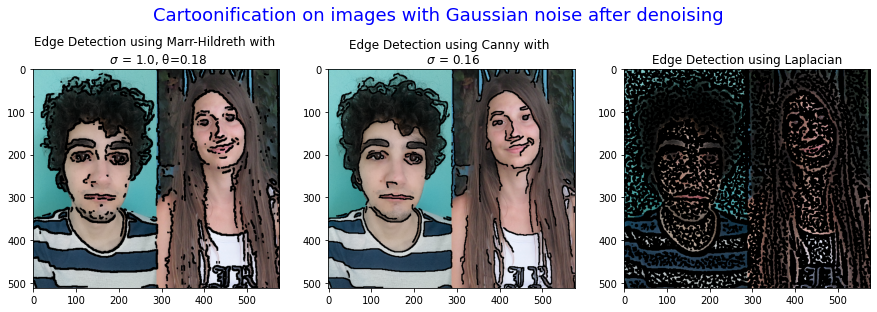

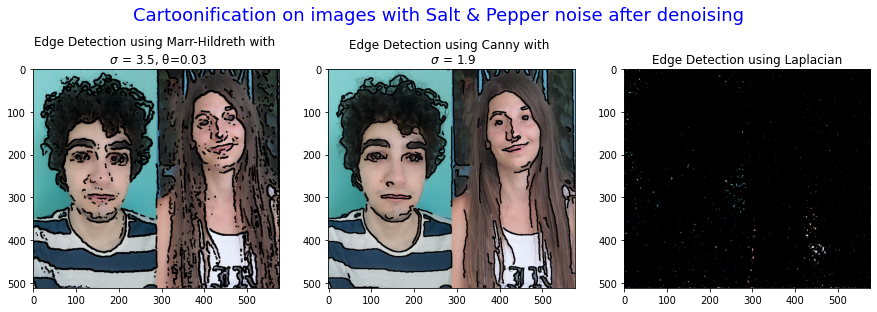

In [13]:

#the following code cartoonifies original image using edges detected on the images with noise
cart_log_gauss = cartoonify(pic, log_gauss_best)
cart_log_snp = cartoonify(pic,log_snp_best)
cart_canny_gauss = cartoonify(pic,canny_gauss_best)
cart_canny_snp = cartoonify(pic,canny_snp_best)
cart_laplacian_gauss = cartoonify(pic,pic_laplacian_gaussian)
cart_laplacian_snp = cartoonify(pic,pic_laplacian_snp)

imshow_all(cart_log_gauss, cart_canny_gauss, cart_laplacian_gauss, titles=[ 'Edge Detection using Marr-Hildreth with \n $\sigma$ = 1.0, θ=0.18', \
                                                                            'Edge Detection using Canny with \n $\sigma$ = 0.16', \
                                                                            'Edge Detection using Laplacian'], \
                                                                              suptl ='Cartoonification on images with Gaussian noise after denoising')

imshow_all(cart_log_snp, cart_canny_snp, cart_laplacian_snp, titles=[ 'Edge Detection using Marr-Hildreth with \n $\sigma$ = 3.5, θ=0.03', \
                                                                            'Edge Detection using Canny with \n $\sigma$ = 1.9', \
                                                                            'Edge Detection using Laplacian'], \
                                                                              suptl ='Cartoonification on images with Salt & Pepper noise after denoising')

Τα αποτελέσματα του cartoonification φαίνονται παραπάνω. Γενικά ο Canny ανιχνευτής επιτυγχει λιγότερο θορυβώδη αποτελέσματα και επομένως πιο ευκρινές cartoonification. Επομένως, στην περίπτωση του Salt&Pepper θορύβου όπου υπάρχει πολύ θόρυβος στην εικόνα κρίνουμε πως ο Canny ανιχνευτής επιτυγχάνει καλύτερο cartoonification. \
Σε εικόνες με τον Gaussian θόρυβο, ο Canny επιτυγχάνει ίσως υπερβολικά καθαρά αποτελέσματα, κάτι που δεν παραπέμπει τόσο πολύ σε κόμικ αλλά σε απλό πάτημα διαγραμμάτων, και επομένως προτιμούμε τον Marr-Hildreth ανιχνευτή με τις βέλτιστες παραμέτρους που βρήκαμε. Με αυτές έχουμε ικανοποιητική ανίχνευση των ακμών, αλλά και καλαίσθητη παρουσία θορύβου στο αποτέλεσμα. Βέβαια, αυτές οι κρίσεις βασίζονται στα πλάισια των προσωπικών μας αισθητικών απόψεων και ενδεχομένως σε μια βιομηχανική εφαρμογή να προτιμούσαμε και εδώ τον ανιχνευτή Canny, ο οποίος παράγει σαφώς πιο καθαρά αποτελέσματα. \
Τέλος, ενδιαφέρον παρουσιάζουν τα αποτελέσματα για Laplacian ανιχνευτή, όπου η παρουσία του θορύβου (όταν αυτός είναι Gaussian και επομένως μικρός) είναι εμφανής στο τελικό αποτέλεσμα δημιουργώντας segments στην εικόνα που μοιάζουν με ψηφιδωτό.